In [29]:
# 이미지 넣기
from IPython.display import Image
Image("img/img09_01.png")

FileNotFoundError: No such file or directory: 'img/img09_01.png'

FileNotFoundError: No such file or directory: 'img/img09_01.png'

<IPython.core.display.Image object>

In [30]:
Image("img/img09_02.png")

FileNotFoundError: No such file or directory: 'img/img09_02.png'

FileNotFoundError: No such file or directory: 'img/img09_02.png'

<IPython.core.display.Image object>

In [31]:
Image("img/img09_03.png")

FileNotFoundError: No such file or directory: 'img/img09_03.png'

FileNotFoundError: No such file or directory: 'img/img09_03.png'

<IPython.core.display.Image object>

### 1. 군집 분석(클러스터링=Clustering) 의 이해

In [32]:
Image("img/img09_04.png")

FileNotFoundError: No such file or directory: 'img/img09_04.png'

FileNotFoundError: No such file or directory: 'img/img09_04.png'

<IPython.core.display.Image object>

In [33]:
Image("img/img09_05.png")

FileNotFoundError: No such file or directory: 'img/img09_05.png'

FileNotFoundError: No such file or directory: 'img/img09_05.png'

<IPython.core.display.Image object>

In [34]:
Image("img/img09_08.png")

FileNotFoundError: No such file or directory: 'img/img09_08.png'

FileNotFoundError: No such file or directory: 'img/img09_08.png'

<IPython.core.display.Image object>

In [35]:
Image("img/img09_09.png")

FileNotFoundError: No such file or directory: 'img/img09_09.png'

FileNotFoundError: No such file or directory: 'img/img09_09.png'

<IPython.core.display.Image object>

### K-means 알고리즘

In [36]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# iris 데이터 수집 
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


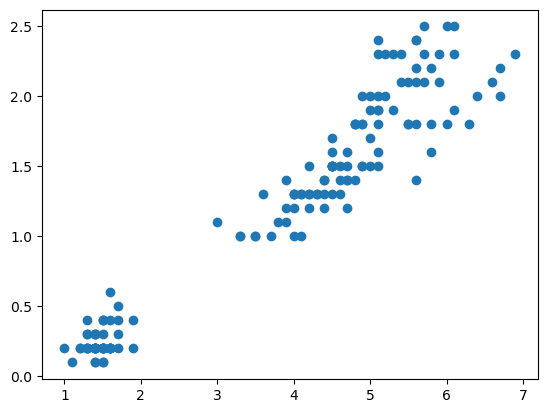

In [39]:
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.show()

##### KMeans 모델 초기화 및 학습
> - km = KMeans(n_clusters=3, random_state=20)은 3개의 클러스터를 찾는 KMeans 모델을 초기화합니다. 
> - random_state=20은 결과의 재현성을 보장하기 위해 설정된 랜덤 시드입니다.
> - km.fit(df.iloc[:, 2:])는 데이터셋의 마지막 두 특성(꽃잎 길이와 너비)으로 KMeans 모델을 학습시킵니다

#### 클러스터 예측 
> - y_pred는 학습된 모델을 사용하여 각 데이터 포인트가 어느 클러스터에 속하는지 예측한 결과입니다.
> - 이 결과는 각 데이터 포인트에 대해 0, 1, 2 중 하나의 클러스터 레이블을 포함합니다.

c:\Users\ICT05-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ICT05-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


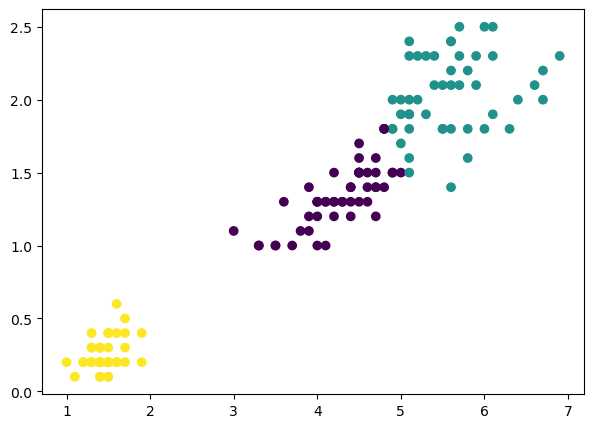

In [40]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7,5))
km = KMeans(n_clusters=3, random_state=20)
km.fit(df.iloc[:, 2:])

# 예측
y_pred = km.predict(df.iloc[:, 2:])

plt.scatter(df.iloc[:, 2], df.iloc[:,3], c=y_pred)

#### 종합 설명
이 코드는 Iris 데이터셋의 꽃잎 길이와 너비를 사용하여 KMeans 클러스터링을 수행하고, 그 결과를 시각화합니다. 3개의 클러스터로 데이터를 나누며, 각 데이터 포인트는 예측된 클러스터에 따라 색상으로 구분되어 플롯에 표시됩니다. 이를 통해 데이터가 어떻게 클러스터링되는지 시각적으로 확인할 수 있습니다.

### 병합 군집

In [41]:
Image("img/img09_10.png")

FileNotFoundError: No such file or directory: 'img/img09_10.png'

FileNotFoundError: No such file or directory: 'img/img09_10.png'

<IPython.core.display.Image object>

In [42]:
Image("img/img09_11.png")

FileNotFoundError: No such file or directory: 'img/img09_11.png'

FileNotFoundError: No such file or directory: 'img/img09_11.png'

<IPython.core.display.Image object>

In [43]:
Image("img/img09_12.png")

FileNotFoundError: No such file or directory: 'img/img09_12.png'

FileNotFoundError: No such file or directory: 'img/img09_12.png'

<IPython.core.display.Image object>

In [44]:
Image("img/img09_13.png")

FileNotFoundError: No such file or directory: 'img/img09_13.png'

FileNotFoundError: No such file or directory: 'img/img09_13.png'

<IPython.core.display.Image object>

In [45]:
Image("img/img09_14.png")

FileNotFoundError: No such file or directory: 'img/img09_14.png'

FileNotFoundError: No such file or directory: 'img/img09_14.png'

<IPython.core.display.Image object>

#### 링키지 방법 설정 및 클러스터링 수행

> AgglomerativeClustering의 **metric 파라미터**는 **거리 측정 방법을 지정**합니다. 'euclidean'은 유클리드 거리를 의미합니다.

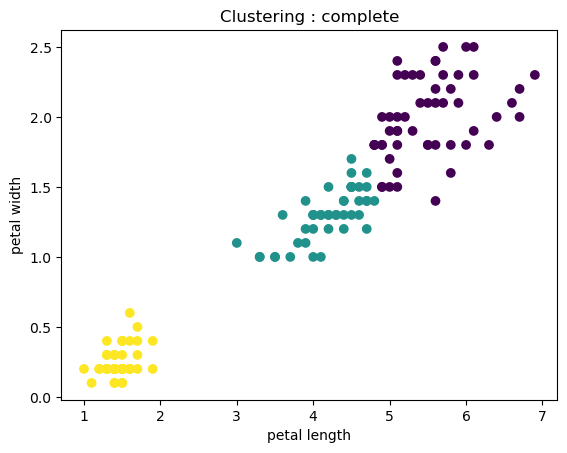

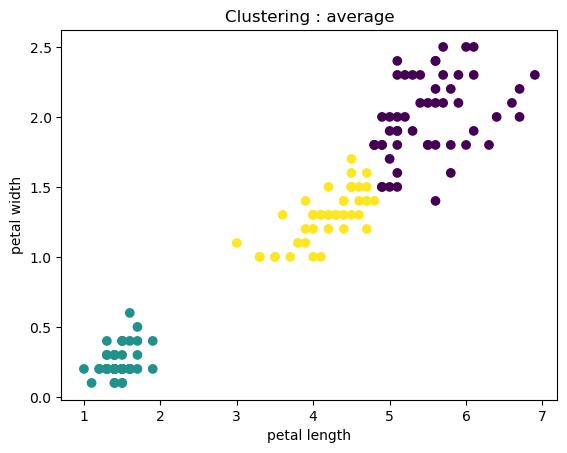

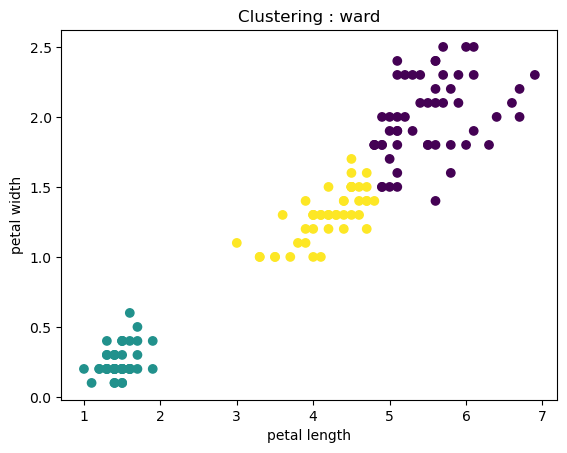

In [46]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

linkages = ['complete', 'average', 'ward']
for i, l in enumerate(linkages):
    plt.figure(i)
    hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=l)
    hier.fit(df.iloc[:, 2:])
    plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=hier.labels_)
    plt.title("Clustering : " + l)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

#### KMeans: 데이터 포인트를 k개의 클러스터로 나누는 알고리즘입니다. 각 클러스터는 클러스터 중심을 기준으로 합니다.
#### DBSCAN: 밀도 기반 클러스터링 알고리즘으로, 밀집된 데이터 포인트 그룹을 클러스터로 식별합니다.
#### MeanShift: 데이터의 밀도 중심을 찾는 알고리즘입니다.
#### Birch: 대용량 데이터셋을 효과적으로 클러스터링하는 알고리즘입니다.

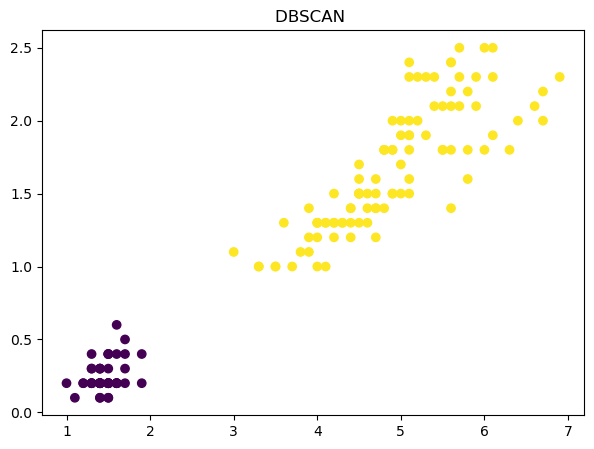

In [47]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(7,5))
## eps=0.5 : 두 포인트가 서로 이웃으로 간주 될 최대 거리 
#  min_samples=5 : 하나의 클러스터을 형성하는데 필요한 최소 포인트 수
# 반경 0.5 이내에 최소 5개의 포인트가 있을 때  클러스터 형성
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(df.iloc[:, 2:])
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=db.labels_)
plt.title("DBSCAN ")
plt.show()

### 군집 모델의 평가

#### 1) Silhouette Coefficient(실루엣 계수)

> - 군집화 결과의 품질을 측정하는데 사용되는 지표
> - 각 객체가 자신의 군집 안에서 얼마나 잘맞는지, 다른 군집과 얼마나 잘 구분되는지를 정량화 한다.
> s(i) =  b(i)−a(i) / max(a(i),b(i))   
       
군집 내의 하나의 데이터 포인트 x에서 
- a(i)는 데이터 포인트 𝑖 가 속한 클러스터 내에서의 평균 거리입니다.
- b(i)는 데이터 포인트 𝑖 와 가장 가까운 다른 클러스터와의 평균 거리입니다.

#### 실루엣 계수의 해석
> - **1에 가까운 값**: 데이터 포인트가 잘 클러스터링되었음을 의미합니다. <br>해당 포인트가 자신이 속한 클러스터 내에서 밀집되어 있고 다른 클러스터와 잘 분리되어 있다는 것을 나타냅니다.
> - **0에 가까운 값**: 데이터 포인트가 두 클러스터의 경계에 위치해 있음을 의미합니다.
> - **-1에 가까운 값**: 데이터 포인트가 잘못된 클러스터에 할당되었음을 의미합니다.<br>해당 포인트가 다른 클러스터의 중심에 더 가깝다는 것을 나타냅니다.

In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.datasets import load_iris

In [49]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [51]:
print(iris.target_names, iris.feature_names)

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
# AgglomerativeClustering(계층형 군집화 수행하기)
hier = AgglomerativeClustering(n_clusters=3)
cluster_labels = hier.fit_predict(df.iloc[:, 2:])

print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [60]:
# 변수 2개일 때 응집도
silhouette = silhouette_score(df.iloc[:, 2:], cluster_labels)
print("2개 변수 사용 시 응집률 : " , silhouette)

2개 변수 사용 시 응집률 :  0.6573949269287823


In [61]:
# 모든 변수 사용했을 때의 응집도
silhouette = silhouette_score(df, cluster_labels)
print("모든 변수 사용 시 응집률 : " , silhouette)

모든 변수 사용 시 응집률 :  0.5173141370124015


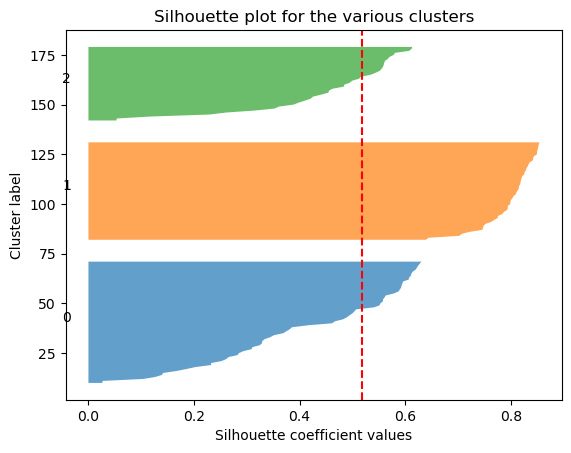

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, labels)

y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette, color="red", linestyle="--")
plt.show()